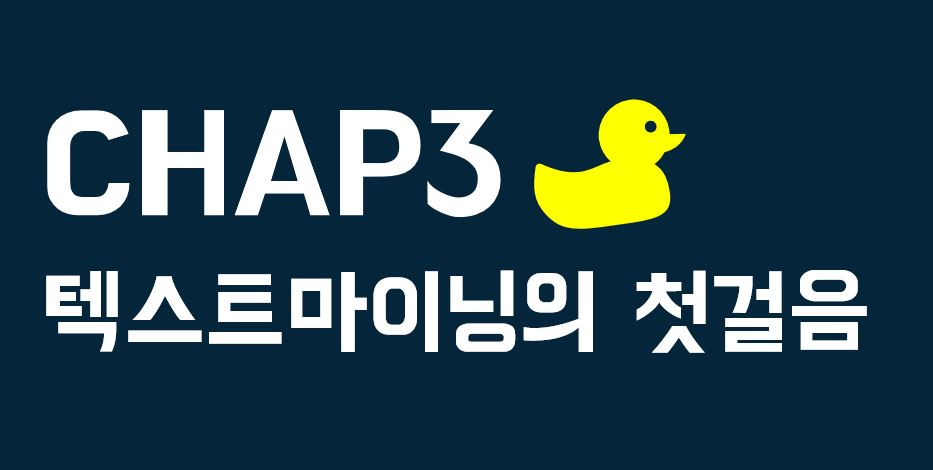

In [4]:
from IPython.display import Image

Image("14.jpg")

-----

# 2.1) 나무위키 최신 변경 문서의 키워드 분석

### 바로가기

- [<Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기](#<Step1.-크롤링>-:-크롤링으로-웹-데이터-가져오기)
    - [BeautifulSoup을 이용한 웹 크롤링]
    - [나무위키 최근변경 데이터 크롤링]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [말뭉치 만들기]
    - [konlpy를 이용한 키워드 추출]
    - [키워드 가다듬기]
- [<Step3. 시각화> : 워드 클라우드 시각화](#<Step3.-시각화>-:-워드-클라우드-시각화)
    - [pytagcloud 사용하기]
    - [나무위키 키워드 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

### [BeautifulSoup을 이용한 웹 크롤링]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install requests`
    - (env_name) `pip install beautifulsoup4`
    - (env_name) `pip install lxml`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [12]:
!pip install requests beautifulsoup4 lxml

-----

##### 페이지 리스트 가져오기

In [128]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content

soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [5]:
print(req) #응답 코드가 나옴! 
print(type(req))
#req.

<Response [200]>
<class 'requests.models.Response'>


### ◎ reqest 모듈의 메소드들
- req.content : 응답한 데이터(byte), 음악, 비디오 등 byte자체를 받아 저장할 때
- req.text : 응답한 데이터(str), 주로 웹페이지 소스코드나 문자데이터 확인할 때


- req.encoding : 응답 데이터 인코딩 방식
- req.url : 요청한 url
- req.status_code: 응답 결과 (200: 성공(ok), 400대: 실패))
- req.headers: 응답데이터의 헤더

In [5]:
req.encoding #응답한 데이터의 인코딩 방식

'utf-8'

#### ▶ req.encoding : 응답한 데이터의 인코딩 방식
  - 1) 일반적으로 한글이 깨지지 않음 : 유니코드 인코딩(예: UTF-8 등), 한글 인코딩(예: EUC-KR)
  - 2) 영문인코딩인 경우 한글이 깨짐 -> ISO-8859-1

 - 해결방법:Response 객체의 encoding 을 한글인코딩(예: EUC-KR)이나 None (인코딩 추즉을 하지 않도록) 으로 지정한 후, text 속성 읽기

In [6]:
req.url

'https://namu.wiki/RecentChanges'

In [8]:
req.headers

{'Date': 'Thu, 12 Mar 2020 15:35:13 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d87ffc548e618e8b9c1b4bce8c123729c1584027313; expires=Sat, 11-Apr-20 15:35:13 GMT; path=/; domain=.namu.wiki; HttpOnly; SameSite=Lax; Secure, __cfuid=Bqls04m0J4EtWho5KS%2F%2BwQ%3D%3D; Domain=.namu.wiki; Path=/; Expires=Fri, 12 Mar 2021 15:35:13 GMT; HttpOnly', 'ETag': 'W/"2dec3-8ofBrMnHe/Qul644+rD/6AZ0JHo"', 'X-Namu-Region': 'J', 'X-Powered-By': 'PHP/5.4.20', 'Content-Encoding': 'gzip', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Alt-Svc': 'h3-27=":443"; ma=86400, h3-25=":443"; ma=86400, h3-24=":443"; ma=86400, h3-23=":443"; ma=86400', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'X-Content-Type-Options': 'nosniff', 'Server': 'cloudflare', 'CF-RAY': '572e95731c57e9cc-ICN'}

In [10]:
req.status_code

200

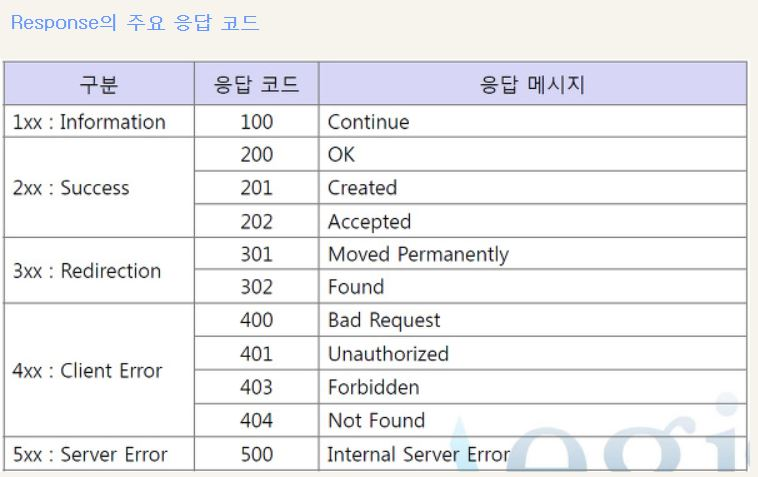

In [4]:
from IPython.display import Image

Image("3.jpg")

In [6]:
html

b'<!doctype html>\n<html data-n-head-ssr><head ><title>\xec\xb5\x9c\xea\xb7\xbc \xeb\xb3\x80\xea\xb2\xbd\xeb\x82\xb4\xec\x97\xad - \xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width"><meta data-n-head="ssr" http-equv="x-ua-compatible" content="ie=edge"><meta data-n-head="ssr" name="generator" content="the seed"><meta data-n-head="ssr" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" name="application-name" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4"><meta data-n-head="ssr" name="msapplication-tooltip" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4"><meta data-n-head="ssr" name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8"><meta data-n-head="ssr" name="theme-color" content="#008275"><meta data-n-head="ssr" name

In [10]:
html2 = req.text
html2

'<!doctype html>\n<html data-n-head-ssr><head ><title>최근 변경내역 - 나무위키</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width"><meta data-n-head="ssr" http-equv="x-ua-compatible" content="ie=edge"><meta data-n-head="ssr" name="generator" content="the seed"><meta data-n-head="ssr" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" name="application-name" content="나무위키"><meta data-n-head="ssr" name="msapplication-tooltip" content="나무위키"><meta data-n-head="ssr" name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8"><meta data-n-head="ssr" name="theme-color" content="#008275"><meta data-n-head="ssr" name="googlebot" content="noarchive"><link data-n-head="ssr" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="ssr" rel="search" type="application/opensearchdescription+xml" title

### BeautifulSoup

Requests는 정말 좋은 라이브러리이지만, html을 '의미있는', 즉 Python이 이해하는 객체 구조로 만들어주지는 못한다. 

위에서 req.text는 python의 문자열(str)객체를 반환할 뿐이기 때문에 정보를 추출하기가 어렵다.

따라서 BeautifulSoup을 이용하게 된다. 이 BeautifulSoup은 html 코드를 Python이 이해하는 객체 구조로 변환하는 Parsing을 맡고 있고, 이 라이브러리를 이용해 우리는 제대로 된 '의미있는' 정보를 추출해 낼 수 있다.

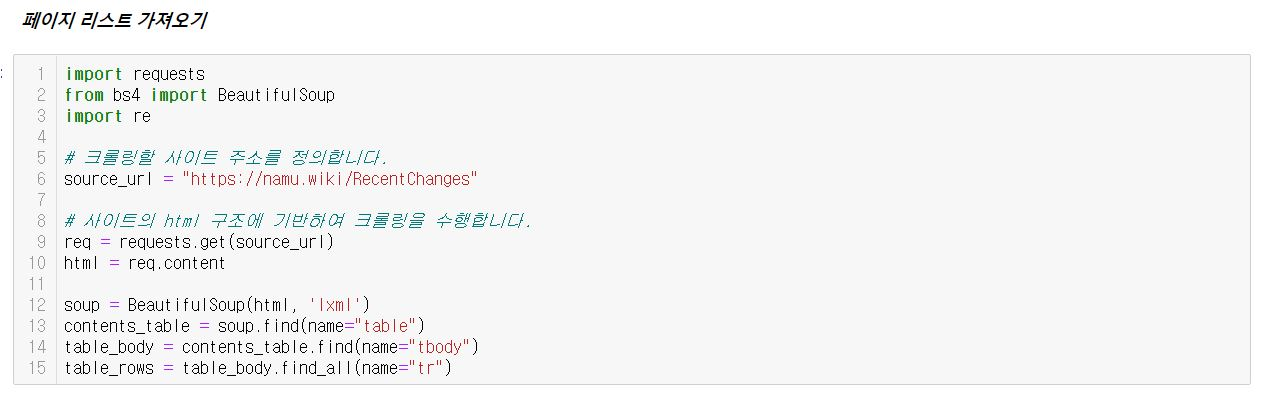

In [4]:
from IPython.display import Image


Image("2.jpg") 

In [11]:
#Soup객체에 대해서 알아보자!
type(soup)

#soup객체의 메소드들
#soup.

bs4.BeautifulSoup

#### Beautifulsoup의 find 관련 메소드  : find(), find_all() 
1) 태그 종류로 찾기
  - find(태그종류)  #td, tr, table...
  - 태그 종류 정리 : https://sime.tistory.com/90
  
2) 클래스 값으로 찾기
   -find("[태그명]", class_="[클래스명]")

3) id 명으로 찾기
   -find("[태그명]", id_="[아이디명]")
   
4) 옵션들 넣어서 찾기
  - find() 
    - find(name, attrs, recursive, string, **kwargs)
    - 해당 조건에 맞는 하나의 태그를 가져온다. 중복이면 가장 첫 번째 태그를 가져온다.


   -  find_all()
     - find_all(name, attrs, recursive, string, limit, **kwargs)
     - 해당 조건에 맞는 모든 태그들을 가져온다


In [79]:
# find(), find_all() 테스트해보기! 
url_gongyou= "https://ko.wikipedia.org/wiki/%ED%8E%AD%EC%88%98"
req2 = requests.get(url_pengsoo)

html2 = req2.text
soup2 = BeautifulSoup(html, 'lxml')
print("*****find()일때!*** \n",soup2.find("td"))
print("*****findall()일때!*** \n",soup2.find_all("td"))


*****find()일때!*** 
 <td colspan="2" style="text-align:center"><a class="image" href="/wiki/%ED%8C%8C%EC%9D%BC:%ED%8E%AD%EC%88%98.jpg"><img alt="" data-file-height="310" data-file-width="500" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/300px-%ED%8E%AD%EC%88%98.jpg" srcset="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/450px-%ED%8E%AD%EC%88%98.jpg 1.5x, //upload.wikimedia.org/wikipedia/ko/d/d4/%ED%8E%AD%EC%88%98.jpg 2x" width="300"/></a></td>
*****findall()일때!*** 
 [<td colspan="2" style="text-align:center"><a class="image" href="/wiki/%ED%8C%8C%EC%9D%BC:%ED%8E%AD%EC%88%98.jpg"><img alt="" data-file-height="310" data-file-width="500" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/300px-%ED%8E%AD%EC%88%98.jpg" srcset="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/450px-%ED%8E%AD%EC%88%98.jpg 1.5x, //upload.wikimedia.org/wiki

In [80]:
#2) 클래스 값으로 찾기 

a= soup2.find("table", class_ = "infobox")
b=a.find_all("a")


print(a)
print(type(b))
# b=a.find_all(name ="a")
# print(b)

<table class="infobox" style="width:25em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background:#DEDEE2;">펭수</th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/%ED%8C%8C%EC%9D%BC:%ED%8E%AD%EC%88%98.jpg"><img alt="" data-file-height="310" data-file-width="500" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/300px-%ED%8E%AD%EC%88%98.jpg" srcset="//upload.wikimedia.org/wikipedia/ko/thumb/d/d4/%ED%8E%AD%EC%88%98.jpg/450px-%ED%8E%AD%EC%88%98.jpg 1.5x, //upload.wikimedia.org/wikipedia/ko/d/d4/%ED%8E%AD%EC%88%98.jpg 2x" width="300"/></a></td></tr><tr><th scope="row" style="width:25%;"><b>첫 등장</b></th><td>2019년 3월 20일</td></tr><tr><th colspan="2" style="text-align:center;background:#DEDEE2;">정보</th></tr><tr><th scope="row" style="width:25%;"><b>종족</b></th><td>펭귄</td></tr><tr><th scope="row" style="width:25%;"><b>나이</b></th><td>10살</td></tr><tr><th scope="row" style

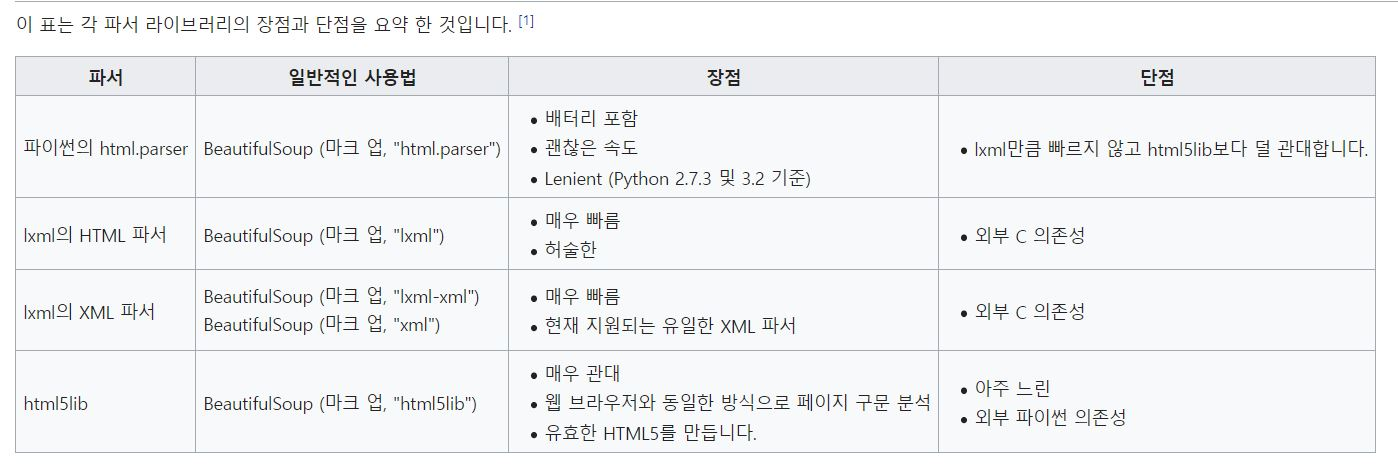

In [2]:
from IPython.display import Image

Image("1.jpg")
 

In [147]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content

soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")


In [130]:
print("contents_table: ",type(contents_table))
print("table_body: ",type(table_body))
print("table_rows: ",type(table_rows))

contents_table:  <class 'bs4.element.Tag'>
table_body:  <class 'bs4.element.Tag'>
table_rows:  <class 'bs4.element.ResultSet'>


In [148]:
print(len(table_rows))

109


In [149]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)
https://namu.wiki/w/%EB%8C%80%ED%95%99%20%EA%B0%84%20%ED%86%B5%ED%8F%90%ED%95%A9
https://namu.wiki/w/%EC%8A%AC%EB%A6%AC%ED%94%BC%20%ED%86%A0%EB%93%9C
https://namu.wiki/w/%EC%8A%A4%ED%8B%B1%20%EC%97%A0%ED%8C%8C%EC%9D%B4%EC%96%B4%EC%A6%88
https://namu.wiki/w/%EB%A6%AC%EA%B3%A0%EB%AA%A8%EB%A5%B4


In [114]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(2):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    print("*****first_td:",first_td)
    print("-----------------------",index,"번째---------------------------------------------------------------------")
    print("*****td_url:",td_url)   
    print("--------------------------------------------------------------------------------------------------------")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

*****first_td: <td data-v-24f321a4=""><a data-v-24f321a4="" href="/w/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98">환마황제 라비엘</a> <a data-v-24f321a4="" href="/history/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98">[역사]</a> <a data-v-24f321a4="" href="/diff/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98?rev=88&amp;oldrev=87">[비교]</a> <a data-v-24f321a4="" href="/discuss/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98">[토론]</a> <span data-v-24f321a4="">(<span class="p" data-v-24f321a4="" data-v-3ee54395="">+35</span>)</span></td>
----------------------- 0 번째---------------------------------------------------------------------
*****td_url: [<a data-v-24f321a4="" href="/w/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98">환마황제 라비엘</a>, <a data-v-24f321a4="" href="/history/%ED%99%98%EB%A7%88%ED%99%A9%EC%A0%9C%20%EB%9D%BC%EB%B9%84%EC%97%98">[역사]</a>, <a data-v-24f321a4="" href="/diff/%ED%99%98%EB

-----

##### 페이지내 텍스트 구조 확인

In [150]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')

contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})


content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

한유진(우아한 모녀) 


우아한 모녀/등장인물드라마 히로인


한유진 / 제니스  한 / 홍유라배우: 차예련1. 개요2. 작중 행적3. 평가 제니스. 복수의 화신이 되어 사랑하는 남자까지도 복수의 도구로 이용했지만 결국 사랑 앞에, 또 다른 진실 앞에 무너져야 하는 그녀.차미연(캐리정)에 의해 유괴된 딸.폭풍같고 불같은 열정을 가슴에 품고 있는 여자.귀티나는 단아한 외모에 영민하고 깔끔한 성격.자존심이 강해 쉽게 곁을 주지않지만 한 번 마음을 준 상대에게는 한없이약한 성녀와 마녀 두 가지 모습을 가지고 있다.엄마의 기대에 부응하며 실력과 미모를 갖춘 재원으로 성장한 그녀. 거기에 엄마의 재력까지 더해져 그야말로 완벽 그 자체였다.누구나 인정하는 미모의 엘리트.하지만 그녀는 자신을 “복수를 위한 엄마의 걸작품”이라고 생각한다.엄마 앞에서 내색한적은 없다. 엄마의 딸로 태어난 이상, 그녀는 그 운명을 일찌감치 받아들이기로 했다. 그녀는 엄마를 사랑하는 착한 딸이니까.우아한 모녀의 등장인물로 차예련이 연기한다.1990년생 (30세). 불 같은 열정을 가슴에 품고 있는 엘리트 중의 엘리트. 서은하와 홍인철의 친딸로, 캐리 정이 차미연이었던 젊은 시절에 제이그룹에 대한 복수를 위해서 어린아이였던 유진을 유괴하는 바람에 생이별을 당한 것. 당시 서은하는 둘째인 홍세라를 낳기 위하여 진통을 겪고 있었는데, 하필이면 백화점에서 진통을 겪은 탓에 홍유라를 제대로 챙기지 못했다. 그 자리에서 구급대원들에게 실려갈 때에도 은하는 유라를 찾았지만, 결국 그 때 차미연이 유모차를 끌고 간 뒤 캐나다로 자취를 감췄다. 즉, 홍세라와는 친자매로 진짜 이름은 홍유라이다.[1]물론 본인은 이 사실을 모르고 캐리정의 친딸이라 믿고 캐리정의 복수를 위해 자라나게 된다. 비록 엄마의 복수를 위한 도구처럼 되어버리고 삶이 행복하지 않은 것 같음에도 엄마를 위해선 감수해야한다는 목적으로 살아왔다. 참고로 어렸을때 캐나다에서 피팅룸에 갇힌 상태에서 캐리에게 버려졌다고 생각된 적이 있는데 이때 일때문

In [155]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')

contents_table = soup.find(name="article")

print("**************contents_table:",contents_table)
print("-------------------------------contents_table 끝---------------------------------------------------------")

title = contents_table.find_all('h1')[0]
print("**************title:",title)
print("-------------------------------------title 끝---------------------------------------------------")

category = contents_table.find_all('ul')[0]
print("**************category:",category)
print("---------------------------------------category 끝-------------------------------------------------")

content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
print("**************content_paragraphs:",content_paragraphs)
print("-------------------------------------------content_paragraphs 끝---------------------------------------------")

content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

**************contents_table: <article data-v-24bb48eb="" data-v-459c4f00=""><!-- --> <!-- --> <div class="r" data-v-24bb48eb="" data-v-5058474b=""><div class="g" data-v-5058474b=""><a data-v-24bb48eb="" href="/member/star/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)"><span class="icon ion-ios-star-outline" data-v-24bb48eb=""></span> 0</a> <!-- --> <a data-v-24bb48eb="" href="/backlink/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)">역링크</a> <a data-v-24bb48eb="" href="/discuss/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)">토론</a> <a data-v-24bb48eb="" href="/edit/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)" rel="nofollow">편집</a> <a data-v-24bb48eb="" href="/history/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)">역사</a> <!-- --> <a data-v-24bb48eb="" href="/acl/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%

In [156]:
req.url

'https://namu.wiki/w/%ED%95%9C%EC%9C%A0%EC%A7%84(%EC%9A%B0%EC%95%84%ED%95%9C%20%EB%AA%A8%EB%85%80)'

- find 함수 관련 자료 
  - https://oolaf.tistory.com/78
  - https://m.cafe.daum.net/flowlife/RUrO/42?q=D_MCiUSfMukTI0&

-----

### [나무위키 최근변경 데이터 크롤링]

In [159]:
import pandas as pd
data_i = [1,2,3]

df_i=pd.DataFrame(data_i, columns=['no'])

df_i

,no
0,1
1,2
2,3


In [160]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [161]:
df.head(5)

,title,category,content_text
0,한유진(우아한 모녀),우아한 모녀/등장인물드라마 히로인,한유진 / 제니스 한 / 홍유라배우: 차예련1. 개요2. 작중 행적3. 평가 제니...
1,대학 간 통폐합,대학교,1. 개요2. 통합 사례2.1. 국공립대학2.2. 사립대학3. 통합 논의 및 루머4...
2,슬리피 토드,스타폭스 시리즈개구리 캐릭터,스 타 폭 스 유 격 대원 년 대 원폭스 맥클라우드팔코 람바디슬리피 토드페피 헤어...
3,스틱 엠파이어즈,플래시 게임,스틱 엠파이어즈 Stick Empires 하는곳 : http://www.sticke...
4,리고모르,엘소드,관련 정보 [ 펼치기 · 접기 ]시스템장비 · 레어 아바타 · 악세사리 · 칭호...


-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

#### re모듈
  - re는 Regular Expression(정규표현식)의 약자
  - 파이썬에서 제공하는 정규표현식 라이브러리
  
  
  -  프로세스-->

     - i) p = re.compile('정규표현식')을 통해서 정규표현식을 컴파일
    
     - ii) 컴파일된 패턴 객체(p)를 이용하여 이 객체가 가지고 있는 메서드를 통해 작업을 수행할 수 있다.

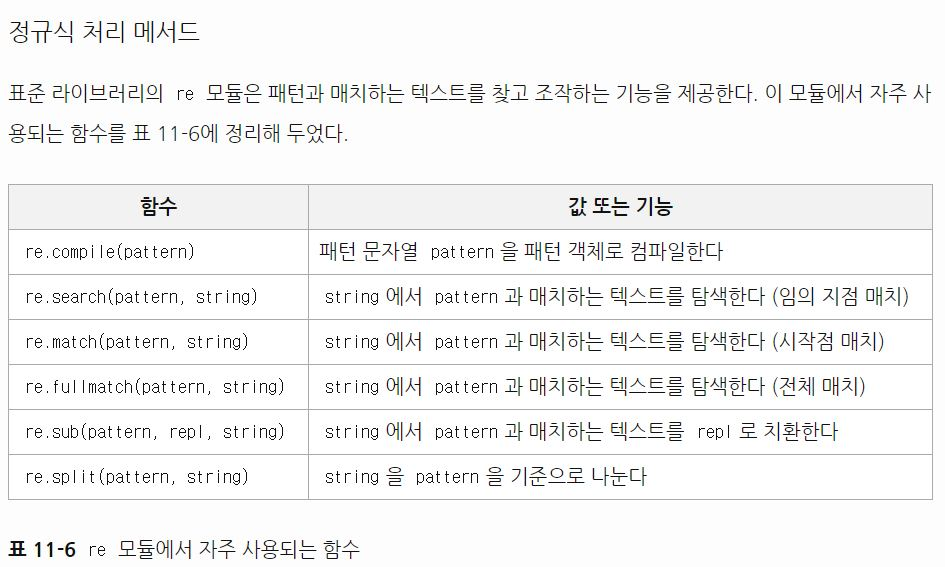

In [163]:
from IPython.display import Image

Image("5.jpg")
 #https://python.bakyeono.net/chapter-11-2.html

In [169]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [172]:
print(type(df['content_text'][0]))
print(df['content_text'][0])


<class 'str'>
한유진 / 제니스  한 / 홍유라배우: 차예련1. 개요2. 작중 행적3. 평가 제니스. 복수의 화신이 되어 사랑하는 남자까지도 복수의 도구로 이용했지만 결국 사랑 앞에, 또 다른 진실 앞에 무너져야 하는 그녀.차미연(캐리정)에 의해 유괴된 딸.폭풍같고 불같은 열정을 가슴에 품고 있는 여자.귀티나는 단아한 외모에 영민하고 깔끔한 성격.자존심이 강해 쉽게 곁을 주지않지만 한 번 마음을 준 상대에게는 한없이약한 성녀와 마녀 두 가지 모습을 가지고 있다.엄마의 기대에 부응하며 실력과 미모를 갖춘 재원으로 성장한 그녀. 거기에 엄마의 재력까지 더해져 그야말로 완벽 그 자체였다.누구나 인정하는 미모의 엘리트.하지만 그녀는 자신을 “복수를 위한 엄마의 걸작품”이라고 생각한다.엄마 앞에서 내색한적은 없다. 엄마의 딸로 태어난 이상, 그녀는 그 운명을 일찌감치 받아들이기로 했다. 그녀는 엄마를 사랑하는 착한 딸이니까.드라마 우아한 모녀의 등장인물로, 배우는 차예련.1990년생 (30세). 불 같은 열정을 가슴에 품고 있는 엘리트 중의 엘리트. 서은하와 홍인철의 친딸로, 캐리 정이 차미연이었던 젊은 시절에 제이그룹에 대한 복수를 위해서 어린아이였던 유진을 유괴하는 바람에 생이별을 당한 것. 당시 서은하는 둘째인 홍세라를 낳기 위하여 진통을 겪고 있었는데, 하필이면 백화점에서 진통을 겪은 탓에 홍유라를 제대로 챙기지 못했다. 그 자리에서 구급대원들에게 실려갈 때에도 은하는 유라를 찾았지만, 결국 그 때 차미연이 유모차를 끌고 간 뒤 캐나다로 자취를 감췄다. 즉, 홍세라와는 친자매로 진짜 이름은 홍유라이다.[1]물론 본인은 이 사실을 모르고 캐리정의 친딸이라 믿고 캐리정의 복수를 위해 자라나게 된다. 비록 엄마의 복수를 위한 도구처럼 되어버리고 삶이 행복하지 않은 것 같음에도 엄마를 위해선 감수해야한다는 목적으로 살아왔다. 참고로 어렸을때 캐나다에서 피팅룸에 갇힌 상태에서 캐리에게 버려졌다고 생각된 적이 있는데 이때 일때문에 폐소공포증이 생긴다.[2] 그럼

In [171]:
print(text_cleaning(df['content_text'][0]))

한유진  제니스  한  홍유라배우 차예련 개요 작중 행적 평가 제니스 복수의 화신이 되어 사랑하는 남자까지도 복수의 도구로 이용했지만 결국 사랑 앞에 또 다른 진실 앞에 무너져야 하는 그녀차미연캐리정에 의해 유괴된 딸폭풍같고 불같은 열정을 가슴에 품고 있는 여자귀티나는 단아한 외모에 영민하고 깔끔한 성격자존심이 강해 쉽게 곁을 주지않지만 한 번 마음을 준 상대에게는 한없이약한 성녀와 마녀 두 가지 모습을 가지고 있다엄마의 기대에 부응하며 실력과 미모를 갖춘 재원으로 성장한 그녀 거기에 엄마의 재력까지 더해져 그야말로 완벽 그 자체였다누구나 인정하는 미모의 엘리트하지만 그녀는 자신을 복수를 위한 엄마의 걸작품이라고 생각한다엄마 앞에서 내색한적은 없다 엄마의 딸로 태어난 이상 그녀는 그 운명을 일찌감치 받아들이기로 했다 그녀는 엄마를 사랑하는 착한 딸이니까드라마 우아한 모녀의 등장인물로 배우는 차예련년생 세 불 같은 열정을 가슴에 품고 있는 엘리트 중의 엘리트 서은하와 홍인철의 친딸로 캐리 정이 차미연이었던 젊은 시절에 제이그룹에 대한 복수를 위해서 어린아이였던 유진을 유괴하는 바람에 생이별을 당한 것 당시 서은하는 둘째인 홍세라를 낳기 위하여 진통을 겪고 있었는데 하필이면 백화점에서 진통을 겪은 탓에 홍유라를 제대로 챙기지 못했다 그 자리에서 구급대원들에게 실려갈 때에도 은하는 유라를 찾았지만 결국 그 때 차미연이 유모차를 끌고 간 뒤 캐나다로 자취를 감췄다 즉 홍세라와는 친자매로 진짜 이름은 홍유라이다물론 본인은 이 사실을 모르고 캐리정의 친딸이라 믿고 캐리정의 복수를 위해 자라나게 된다 비록 엄마의 복수를 위한 도구처럼 되어버리고 삶이 행복하지 않은 것 같음에도 엄마를 위해선 감수해야한다는 목적으로 살아왔다 참고로 어렸을때 캐나다에서 피팅룸에 갇힌 상태에서 캐리에게 버려졌다고 생각된 적이 있는데 이때 일때문에 폐소공포증이 생긴다 그럼에도 엄마가 너무 힘들어서 버린 것이라며 이해해주고 원망을 안하려고 했을 정도로 엄마의 복수를 위한 삶을 다지면서 살았을 정도다

In [176]:
df.head(5)

,title,category,content_text
0,한유진(우아한 모녀),우아한 모녀/등장인물드라마 히로인,한유진 / 제니스 한 / 홍유라배우: 차예련1. 개요2. 작중 행적3. 평가 제니...
1,대학 간 통폐합,대학교,1. 개요2. 통합 사례2.1. 국공립대학2.2. 사립대학3. 통합 논의 및 루머4...
2,슬리피 토드,스타폭스 시리즈개구리 캐릭터,스 타 폭 스 유 격 대원 년 대 원폭스 맥클라우드팔코 람바디슬리피 토드페피 헤어...
3,스틱 엠파이어즈,플래시 게임,스틱 엠파이어즈 Stick Empires 하는곳 : http://www.sticke...
4,리고모르,엘소드,관련 정보 [ 펼치기 · 접기 ]시스템장비 · 레어 아바타 · 악세사리 · 칭호...


In [177]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,한유진우아한 모녀,우아한 모녀등장인물드라마 히로인,한유진 제니스 한 홍유라배우 차예련 개요 작중 행적 평가 제니스 복수의 화신이...
1,대학 간 통폐합,대학교,개요 통합 사례 국공립대학 사립대학 통합 논의 및 루머 유사 사례 국립대 통합네트...
2,슬리피 토드,스타폭스 시리즈개구리 캐릭터,스 타 폭 스 유 격 대원 년 대 원폭스 맥클라우드팔코 람바디슬리피 토드페피 헤어...
3,스틱 엠파이어즈,플래시 게임,스틱 엠파이어즈 하는곳 우리의 백성들은 학살당했고 우리의 고향은...
4,리고모르,엘소드,관련 정보 펼치기 접기 시스템장비 레어 아바타 악세사리 칭호 일람 스...


-----

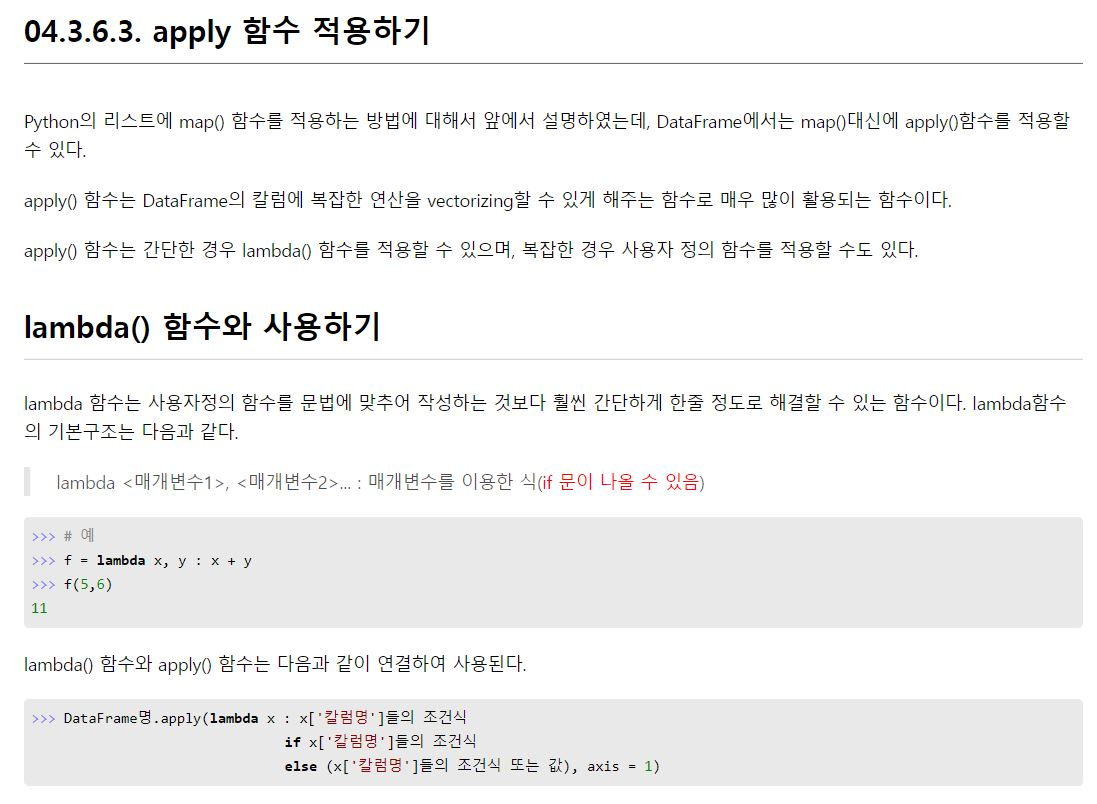

In [175]:
Image("6.jpg")
#https://wikidocs.net/46758

### [말뭉치 만들기]

In [178]:
df.head(5)

,title,category,content_text
0,한유진우아한 모녀,우아한 모녀등장인물드라마 히로인,한유진 제니스 한 홍유라배우 차예련 개요 작중 행적 평가 제니스 복수의 화신이...
1,대학 간 통폐합,대학교,개요 통합 사례 국공립대학 사립대학 통합 논의 및 루머 유사 사례 국립대 통합네트...
2,슬리피 토드,스타폭스 시리즈개구리 캐릭터,스 타 폭 스 유 격 대원 년 대 원폭스 맥클라우드팔코 람바디슬리피 토드페피 헤어...
3,스틱 엠파이어즈,플래시 게임,스틱 엠파이어즈 하는곳 우리의 백성들은 학살당했고 우리의 고향은...
4,리고모르,엘소드,관련 정보 펼치기 접기 시스템장비 레어 아바타 악세사리 칭호 일람 스...


In [189]:
print(df['title'])
print("----------------------")
print(type(df['title']))

0     한유진우아한 모녀 
1      대학 간 통폐합 
2        슬리피 토드 
3      스틱 엠파이어즈 
4          리고모르 
         ...    
67      리들러 챌린지 
68          손성씨 
69           이라 
70           정우 
71           내한 
Name: title, Length: 72, dtype: object
----------------------
<class 'pandas.core.series.Series'>


In [193]:
# 각 피처마다 말뭉치를 생성합니다.
#title_corpus = "".join(df['title'])
title_corpus = "".join(df['title'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

한유진우아한 모녀 대학 간 통폐합 슬리피 토드 스틱 엠파이어즈 리고모르        가면라이더 크로노스 크리스티앙 카바셀레 멜론웹사이트하트수 순위 벨 로즈 전지적 독자 시점 바이오하자드  플래닛 주시나리오 남북통일 창원시인물 엠파이어 토탈 워연합주 이츠카 코토리 영등포구 나카무라 슈고 정지소 동방제국사 서주 대학살 히로시마나가사키 원자폭탄 투하 서윤카운터사이드  피겨 스케이팅 전일본선수권 대회 경주 버스   연오 앵지 아케디아   안티 히어로 비사문천 자오폴아웃  마스터로드 중국인 캐릭터 웅지세무대학교 라스타칸의 대난투 쿠와야마 치유키  동로마 제국 트와이스나의 히어로 아카데미아 해피 레인 야마시로 유이 내일은 미스터트롯 파일성지패식 수페르비아 타카스기 신사쿠 니클라스 클라분데 마인크래프트팁 문명 자연경관 이채연 제대 국회의원 선거후보자 흑기사 키레나이카 범규 쿠와야마 치유키카드 가이런닝맨 카운터사이드사원 오리진 노민우 고소카페 이단심문사건 왕자영요아이템 애디슨 리드 인비디아 용서받지 못한 자한국 영화 프리티 리듬 시리즈그룹 목록 스패로우카운터사이드 리들러 챌린지 손성씨 이라 정우 내한 


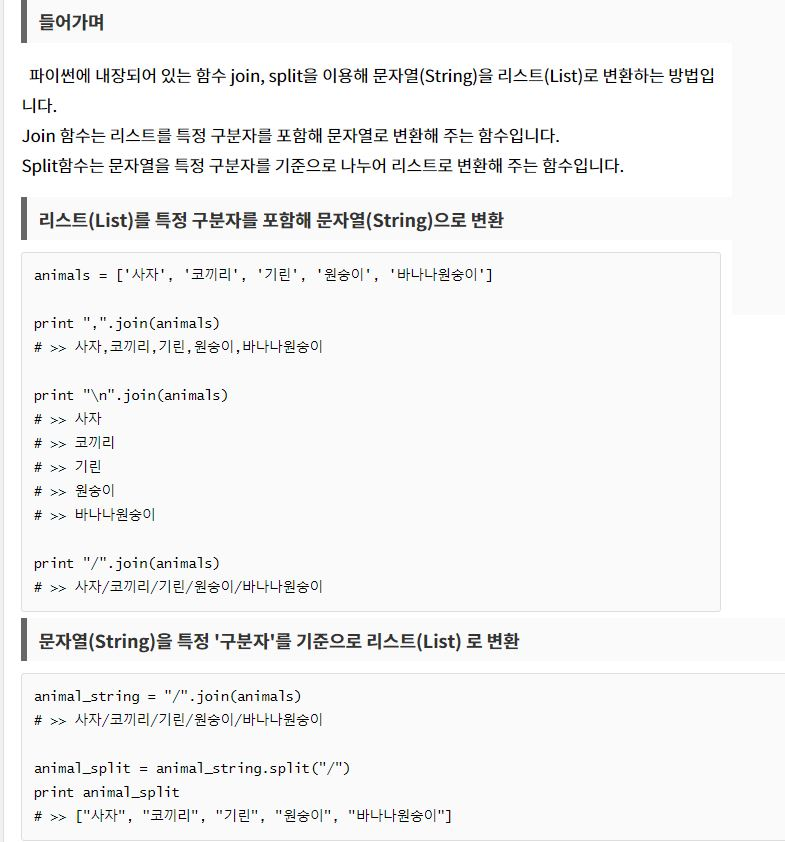

In [180]:
Image("7.jpg")
#https://ourcstory.tistory.com/46

-----

### [konlpy를 이용한 키워드 추출]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Install
        - 1. Java를 설치합니다. (https://java.com/ko/download/)
        - 2. c++ 컴파일러를 설치합니다. 
            - 윈도우 : `Microsoft Visual C++ 14.0` 설치 권장, https://visualstudio.microsoft.com/ko/downloads/
            - Mac OS : `Xcode` 설치 권장
            - Linux : `gcc` 설치 권장
        - 3. 아래와 같은 파이썬 패키지를 설치합니다.
            - (env_name) `pip install konlpy`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`

In [1]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

#https://ellun.tistory.com/46

ValueError: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

##### 1. Okt객체의 noun 메소드

: 'text'에서 명사만 분리/추출하며, 결과 값으로 순환 가능한 객체를 반환

##### 2. Counter객체

:  counting hashable container 객체로서 간단히 말해, 빈도수 계산을 위한 사전형태의 데이터

In [2]:
from IPython.display import Image

Image("8.jpg")

#https://cceeddcc.tistory.com/8 ->
#https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/#comparison-between-pos-tagging-classes -> 형태소분석기간 비교
# https://soyoung-new-challenge.tistory.com/31 -> Okt 형태소분석기에 대한 디테일한 설명

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [14]:
count

Counter({'찌르레기': 16,
         '이명': 10,
         '분류': 53,
         '동물계': 3,
         '척삭동물문': 3,
         '강조': 24,
         '강목': 3,
         '참새목': 3,
         '속': 191,
         '종': 20,
         '멸종': 2,
         '위기': 37,
         '등급': 54,
         '관심': 48,
         '필요': 90,
         '과': 164,
         '조류': 2,
         '시베리아': 5,
         '사할린': 1,
         '섬': 29,
         '쿠릴': 1,
         '열도': 1,
         '만주': 6,
         '등지': 10,
         '서식': 6,
         '개요': 105,
         '특징': 49,
         '모티브': 37,
         '캐릭터': 289,
         '편집': 1206,
         '크기': 43,
         '약': 54,
         '머리': 119,
         '날개': 37,
         '빛': 34,
         '더': 458,
         '얼굴': 75,
         '눈': 97,
         '주위': 30,
         '깃털': 5,
         '몸': 92,
         '아래쪽': 3,
         '회색': 4,
         '꽁': 1,
         '편이': 174,
         '식물': 6,
         '열매': 44,
         '지렁이': 1,
         '먹이': 7,
         '인간': 67,
         '재배': 2,
         '곡물': 2,
         '닥치고': 1,
 

In [1]:
Image("6.jpg")
#https://wikidocs.net/46758

NameError: name 'Image' is not defined

-----

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [15]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'편집': 1206, '때문': 1009, '롯데': 841, '파트': 809, '공격': 628, '경우': 624, '능력': 600, '정도': 596, '자신': 536, '사용': 532, '이후': 520, '사람': 519, '다른': 460, '경차': 410, '유닛': 407, '모습': 405, '미카즈키': 399, '다리우스': 398, '사실': 389, '등장': 377, '위해': 369, '일본': 355, '한국': 353, '이름': 344, '상대': 337, '시간': 329, '하나': 328, '대한': 326, '문제': 315, '상황': 315, '유물': 309, '생각': 303, '또한': 303, '그룹': 290, '캐릭터': 289, '가장': 285, '모두': 278, '당시': 264, '괴물': 263, '사망': 260, '스킬': 250, '시즌': 249, '제라툴': 248, '전투': 248, '가지': 248, '기본': 247, '시작': 245, '피해': 244, '쿼터': 244, '자체': 232, '상태': 230, '대학': 230, '방어': 222, '속도': 221, '실제': 217, '이유': 216, '이상': 216, '운영': 215, '사건': 214, '현재': 213, '관련': 212, '인물': 210, '바다': 209, '문서': 208, '평가': 205, '매우': 204, '건담': 204, '추가': 202, '공허': 201, '모든': 201, '주인공': 200, '전사': 198, '거의': 197, '시리즈': 194, '랩처': 194, '해당': 191, '보호': 191, '다만': 189, '게임': 186, '체력': 186, '경기': 186, '다시': 185, '이용': 184, '여기': 184, '서원대학교': 184, '챔피언': 183, '탈출': 183, '젤나가': 175, '내용': 17

-----

### [개념짚기] 컬렉션 축약

: 컬렉션 (리스트, 집합, 사전) 생성후 값을 추가하는 것이 아니라

컬렉션 생성시 컬렉션내에서 for 문을 사용해 다른 컬렉션의 값들을 한줄로 간략하게 추가합니다.

#### - 리스트 축약(내포)
#### - 집합 축약(내포)
#### - 사전 축약(내포)

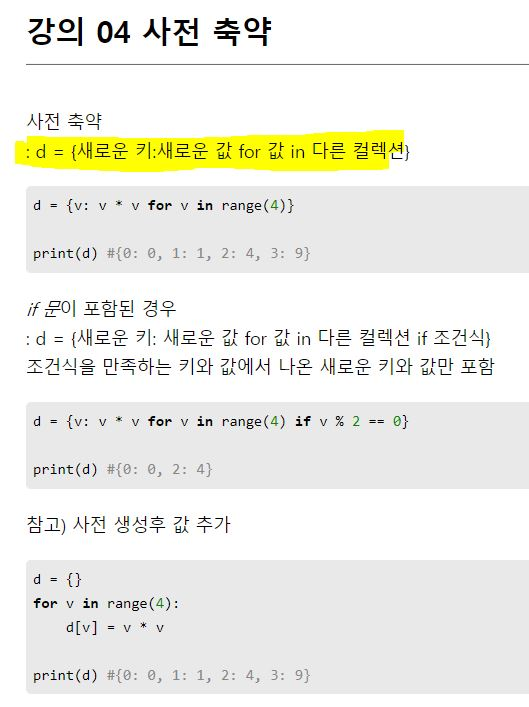

In [1]:
from IPython.display import Image

Image("11.jpg")
#https://wikidocs.net/26565

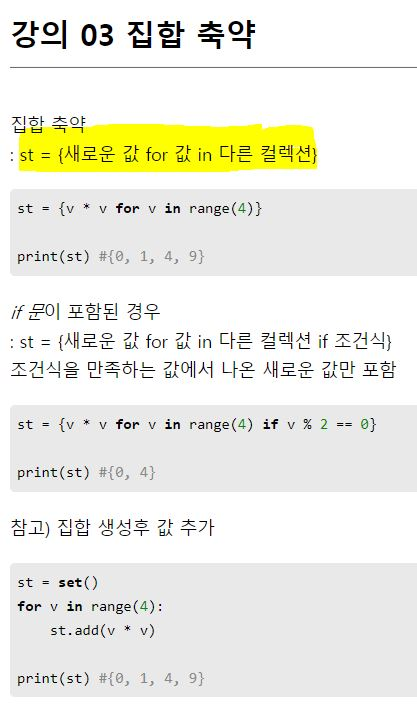

In [2]:
from IPython.display import Image

Image("12.jpg")
#https://wikidocs.net/26565

In [ ]:
from IPython.display import Image

Image("12.jpg")
#https://wikidocs.net/26565

##### 불용어 제거

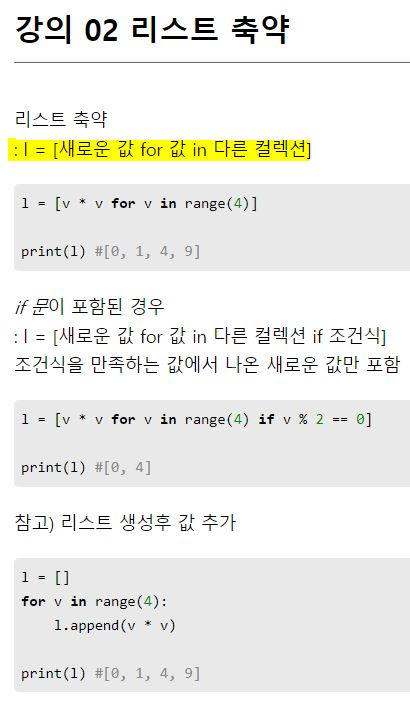

In [3]:
from IPython.display import Image

Image("13.jpg")
#https://wikidocs.net/13

In [16]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [17]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

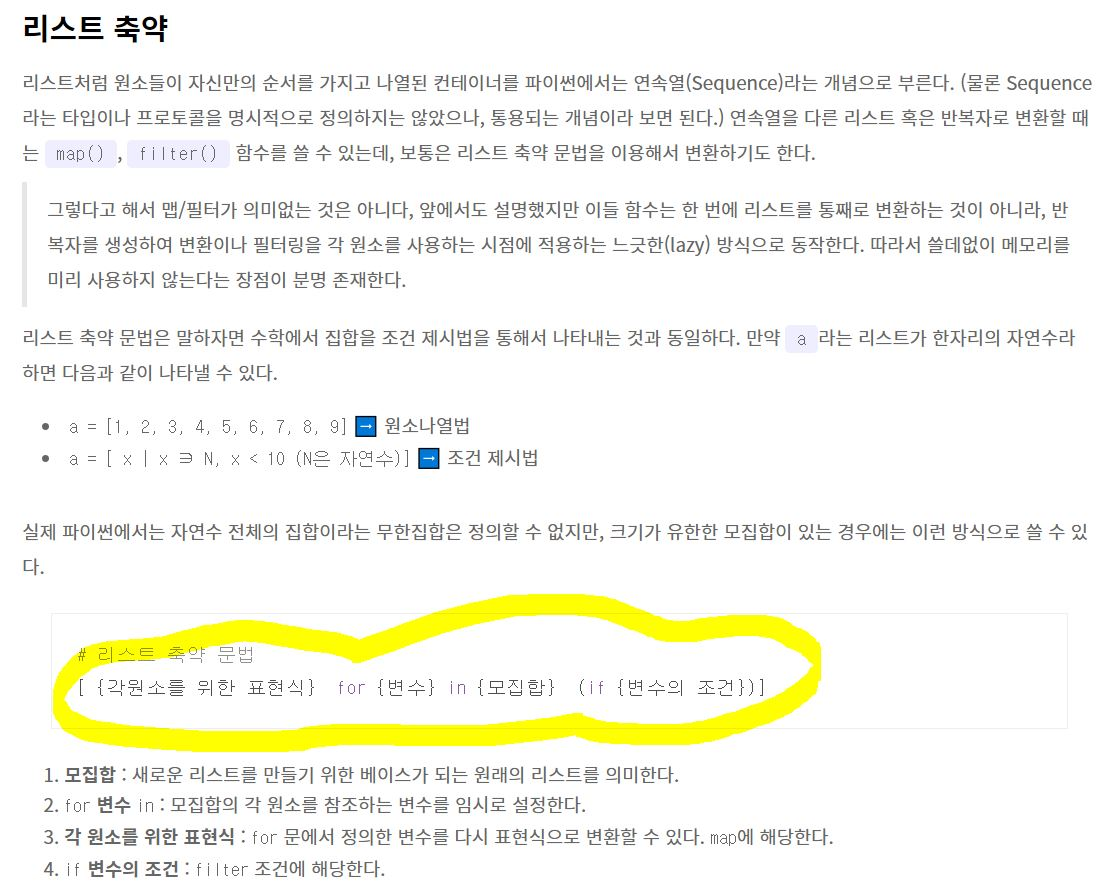

In [10]:
from IPython.display import Image

Image("9.jpg")

In [18]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'롯데': 841, '파트': 809, '공격': 628, '능력': 600, '사람': 519, '경차': 410, '유닛': 407, '미카즈키': 399, '다리우스': 398, '등장': 377, '위해': 369, '일본': 355, '한국': 353, '상대': 337, '대한': 326, '문제': 315, '유물': 309, '그룹': 290, '캐릭터': 289, '가장': 285, '당시': 264, '괴물': 263, '사망': 260, '스킬': 250, '시즌': 249, '제라툴': 248, '전투': 248, '가지': 248, '기본': 247, '시작': 245, '피해': 244, '쿼터': 244, '자체': 232, '상태': 230, '대학': 230, '방어': 222, '속도': 221, '실제': 217, '이유': 216, '운영': 215, '사건': 214, '현재': 213, '관련': 212, '바다': 209, '평가': 205, '건담': 204, '공허': 201, '주인공': 200, '전사': 198, '시리즈': 194, '랩처': 194, '보호': 191, '게임': 186, '체력': 186, '경기': 186, '다시': 185, '이용': 184, '서원대학교': 184, '챔피언': 183, '탈출': 183, '젤나가': 175, '편이': 174, '효과': 174, '마법': 174, '선수': 174, '부분': 170, '대해': 169, '기준': 166, '기술': 164, '지역': 164, '처음': 164, '회사': 163, '소환': 161, '본인': 161, '통해': 160, '역시': 160, '대부분': 159, '카드': 159, '파멸': 158, '라이언': 157, '활동': 156, '사령관': 155, '선원': 155, '존재': 154, '갑판': 154, '레이': 152, '초반': 152, '치어리더': 152, '지금':

-----

# <Step3. 시각화> : 워드 클라우드 시각화

### [pytagcloud 사용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install pytagcloud pygame simplejson`
- 그리고 아래와 같은 경로에 한글 폰트(예: NanumBarunGothic.ttf) 파일을 옮깁니다. 
    - Mac OS : /{anaconda_path}/envs/{env_name}/lib/python3.7/site-packages/pytagcloud/fonts
    - Windosw OS : \{anaconda_path}\envs\{env_name}\Lib\site-packages\pytagcloud\fonts
    - `폰트 다운로드 : http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf`
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행해줍니다. 그래도 아래의 코드가 실행되지 않는 경우는 다음과 같은 작업을 수행합니다.
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가하고 font.json 파일을 저장합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
        },

#https://thinkwarelab.wordpress.com/2016/08/30/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C-%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%EA%B7%B8%EB%A6%AC%EA%B8%B0/

In [19]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


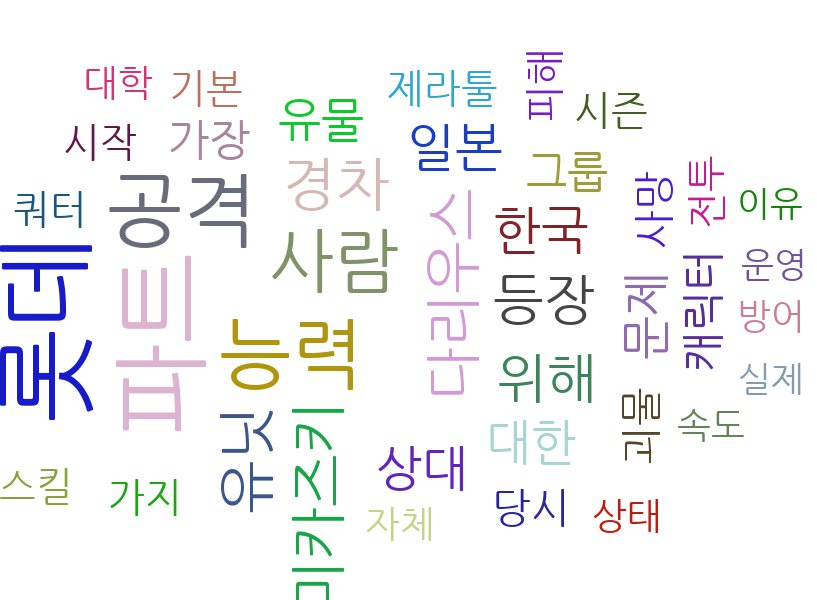

In [20]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### [나무위키 키워드 시각화]

##### 제목 키워드

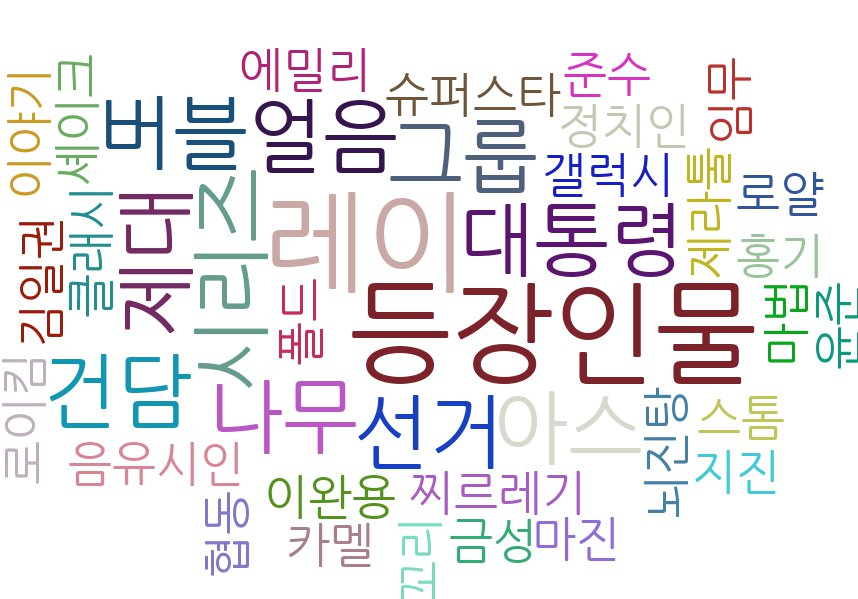

In [21]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

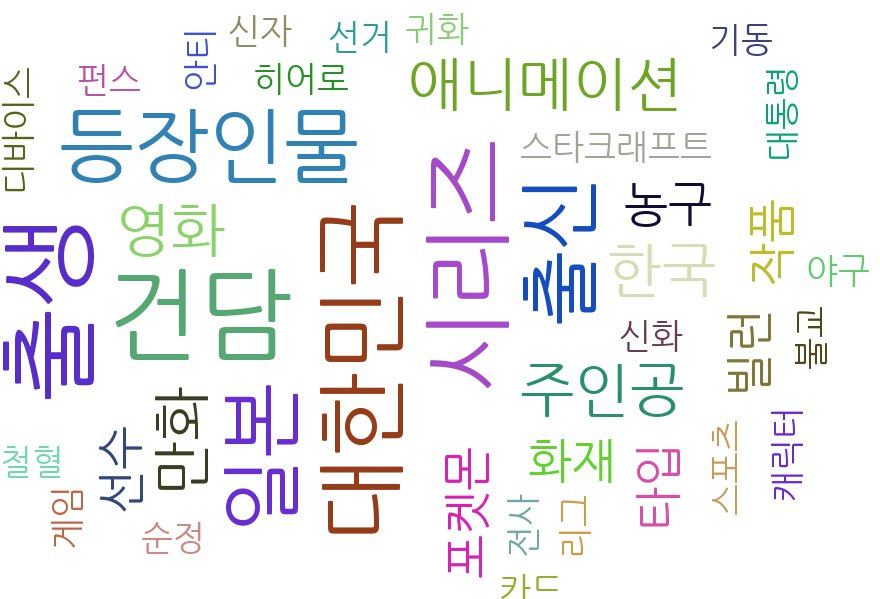

In [22]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')